#NATURAL LANGUAGE PROCESSING PROJECT - 1

#SPAM FILTER PROJECT -> Predicts Ham Vs Spam Message

#IMPORTS

In [3]:
#Import Numpy And Pandas
import numpy as np
import pandas as pd

In [5]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#Import nltk
import nltk

In [9]:
#Get StopWords From nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


        Mittal\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


#GET THE DATA

In [14]:
#Reading messages from file
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [18]:
#View first 10 messages
for i in range(10):
    print(i,messages[i])

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [32]:
#Make a dataframe of label and message
df = pd.DataFrame()
labels = [] #For storing labels
sms = [] #For storing messages
for i in range(5574):
    idx = messages[i].find('\t')
    labels.append(messages[i][0:idx])
    sms.append(messages[i][idx+1:])
df['LABELS']=labels
df['SMS']=sms

In [34]:
#Head Of df
df.head()

,LABELS,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
#Describe on df
df.describe()

,LABELS,SMS
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


#EXPLORATORY DATA ANALYSIS

In [42]:
#Describe on ham label messages
df[df['LABELS']=='ham'].describe()

,LABELS,SMS
count,4827,4827
unique,1,4518
top,ham,"Sorry, I'll call later"
freq,4827,30


In [44]:
#Describe on spam label messages
df[df['LABELS']=='spam'].describe()

,LABELS,SMS
count,747,747
unique,1,642
top,spam,Please call our customer service representativ...
freq,747,4


In [54]:
#Making Length Of Message Feature
lengths=df['SMS'].apply(len)
df['Length Of SMS']=lengths

In [56]:
#New df head
df.head()

,LABELS,SMS,Length Of SMS
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#DATA VISUALIZATION

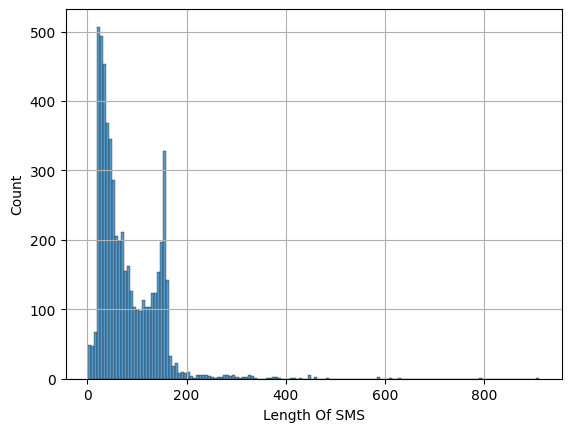

In [65]:
#Histogram On Length Of SMS
sns.histplot(df['Length Of SMS'],bins=150)
plt.grid(True)

In [69]:
#length of longest message
df['Length Of SMS'].describe()['max']

910.0

In [79]:
#Get this message
df[df['Length Of SMS']==910]['SMS'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<Axes: xlabel='Length Of SMS', ylabel='Count'>

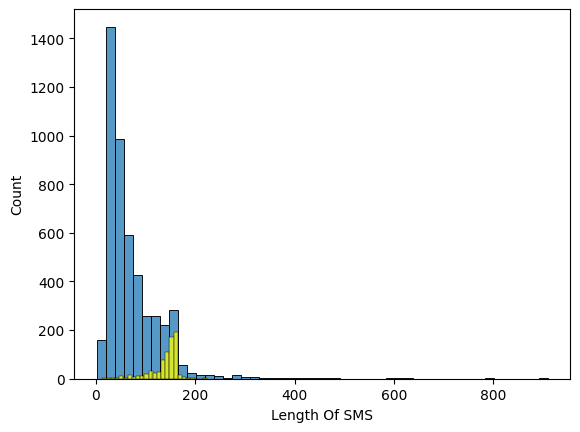

In [109]:
#Histogram of Length Of Message for spam and ham messages
sns.histplot(df[df['LABELS']=='ham']['Length Of SMS'],bins=50)
sns.histplot(df[df['LABELS']=='spam']['Length Of SMS'],bins=25,color='yellow')

In [111]:
#Conclusion -> Spam messages appear to be longer in general as compared to ham messages

#TEXT PREPROCESSING

In [116]:
#Necessary imports
import string
from nltk.corpus import stopwords

In [118]:
#Remove punctuation
def remove_punctuation(n):
    ans = ''
    for i in n:
        if(i not in string.punctuation):
            ans+=i
    return ans

In [120]:
remove_punctuation('Shaurya is a software developer.')

'Shaurya is a software developer'

In [124]:
#Apply it on our SMS
df['SMS'].apply(remove_punctuation)

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will Ã¼ b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: SMS, Length: 5574, dtype: object

In [148]:
#Remove stopwords and make a combined function to remove both punctuation and stopwords
banned_words=stopwords.words('english')
def text_processor(n):
    first_ans = remove_punctuation(n)
    lst = first_ans.split(' ')
    main_ans = []
    for i in lst:
        if i.lower() not in banned_words:
            main_ans.append(i)
    return main_ans

In [150]:
#Apply to our sms
df['SMS'].apply(text_processor)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5569    [2nd, time, tried, 2, contact, u, U, Â£750, Po...
5570                  [Ã¼, b, going, esplanade, fr, home]
5571                   [Pity, , mood, Soany, suggestions]
5572    [guy, bitching, acted, like, id, interested, b...
5573                                   [Rofl, true, name]
Name: SMS, Length: 5574, dtype: object

#VECTORIZATION

#Steps:

1.Count how many times does a word occur in each message (Known as term frequency)

2.Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3.Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [159]:
#Importing CountVectorizer from scikit-learn for converting text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

In [161]:
#Creating a CountVectorizer instance with a custom text processor and fitting it to the 'SMS' column of the dataframe
my_matrix = CountVectorizer(analyzer=text_processor).fit(df['SMS'])

In [163]:
my_matrix

CountVectorizer(analyzer=<function text_processor at 0x0000024F0D100540>)

In [177]:
#Apply it on one of our message
print(my_matrix.transform([df['SMS'][5572]]))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (1, 11426)>
  Coords	Values
  (0, 4509)	1
  (0, 5056)	1
  (0, 5252)	1
  (0, 6283)	1
  (0, 6700)	1
  (0, 6800)	1
  (0, 6985)	1
  (0, 7288)	1
  (0, 7395)	1
  (0, 7801)	1
  (0, 8421)	1
  (0, 9916)	1
  (0, 10788)	1
  (0, 11007)	1


In [181]:
#Getting featire names 
print(my_matrix.get_feature_names_out()[4509])

acted


In [187]:
#Applying it on our entire df
token_count_matrix = my_matrix.transform(df['SMS'])
print(token_count_matrix)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51449 stored elements and shape (5574, 11426)>
  Coords	Values
  (0, 1111)	1
  (0, 1484)	1
  (0, 2061)	1
  (0, 4654)	1
  (0, 5218)	1
  (0, 5219)	1
  (0, 5770)	1
  (0, 6218)	1
  (0, 6907)	1
  (0, 6938)	1
  (0, 7556)	1
  (0, 7669)	1
  (0, 8337)	1
  (0, 8918)	1
  (0, 10966)	1
  (0, 11164)	1
  (1, 2452)	1
  (1, 3065)	1
  (1, 7702)	1
  (1, 8591)	1
  (1, 10699)	1
  (1, 11073)	1
  (2, 74)	1
  (2, 424)	1
  (2, 431)	1
  :	:
  (5570, 6883)	1
  (5570, 7160)	1
  (5570, 11417)	1
  (5571, 0)	1
  (5571, 3229)	1
  (5571, 3722)	1
  (5571, 8253)	1
  (5571, 10200)	1
  (5572, 4509)	1
  (5572, 5056)	1
  (5572, 5252)	1
  (5572, 6283)	1
  (5572, 6700)	1
  (5572, 6800)	1
  (5572, 6985)	1
  (5572, 7288)	1
  (5572, 7395)	1
  (5572, 7801)	1
  (5572, 8421)	1
  (5572, 9916)	1
  (5572, 10788)	1
  (5572, 11007)	1
  (5573, 3432)	1
  (5573, 8349)	1
  (5573, 10649)	1


In [193]:
#No. Of Non zero occurences
token_count_matrix.nnz

51449

In [195]:
#Importing TfidfTransformer from scikit-learn to convert a count-based matrix into a TF-IDF representation
from sklearn.feature_extraction.text import TfidfTransformer

In [199]:
#Creating a TfidfTransformer instance and fitting it to the token count matrix to compute IDF values
tfidf_transformer =TfidfTransformer().fit(token_count_matrix)

In [221]:
print(tfidf_transformer.transform(my_matrix.transform([df['SMS'][4500]])))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18 stored elements and shape (1, 11426)>
  Coords	Values
  (0, 88)	0.26989162556451585
  (0, 446)	0.26989162556451585
  (0, 601)	0.26258259893722663
  (0, 924)	0.26258259893722663
  (0, 3474)	0.26258259893722663
  (0, 3507)	0.2098657514743775
  (0, 3550)	0.18230037065764193
  (0, 5423)	0.22062584271846858
  (0, 5777)	0.2398786885194467
  (0, 6437)	0.23390677893260223
  (0, 6910)	0.2515615117387663
  (0, 7090)	0.1906129056733994
  (0, 7338)	0.26258259893722663
  (0, 7865)	0.2471877151467359
  (0, 8902)	0.19702448386123383
  (0, 10379)	0.15662897533349002
  (0, 10760)	0.22448380472895596
  (0, 11231)	0.25661068935038217


In [217]:
print(my_matrix.transform([df['SMS'][4500]]))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 18 stored elements and shape (1, 11426)>
  Coords	Values
  (0, 88)	1
  (0, 446)	1
  (0, 601)	1
  (0, 924)	1
  (0, 3474)	1
  (0, 3507)	1
  (0, 3550)	1
  (0, 5423)	1
  (0, 5777)	1
  (0, 6437)	1
  (0, 6910)	1
  (0, 7090)	1
  (0, 7338)	1
  (0, 7865)	1
  (0, 8902)	1
  (0, 10379)	1
  (0, 10760)	1
  (0, 11231)	1


In [225]:
#Transforming the token count matrix into a TF-IDF weighted representation
tfidf_matrix=tfidf_transformer.transform(token_count_matrix)

In [231]:
#Retrieving the IDF (Inverse Document Frequency) value for the word 'University' from the trained TfidfTransformer
tfidf_transformer.idf_[my_matrix.vocabulary_['University']]

8.932900415768374

#TRAINING A MODEL

In [268]:
#Importing MultinomialNB from scikit-learn for building a Naïve Bayes classifier suitable for text classification tasks
from sklearn.naive_bayes import MultinomialNB

In [270]:
#Creating and training a Multinomial Naïve Bayes model using the TF-IDF matrix and corresponding labels
model = MultinomialNB().fit(tfidf_matrix,df['LABELS'])

In [272]:
model

MultinomialNB()

In [264]:
#Predicting the label for the SMS message at index 4500 by transforming it into a TF-IDF representation and passing it through the trained model
model.predict(tfidf_transformer.transform(my_matrix.transform([df['SMS'][4500]])))

array(['spam'], dtype='<U4')

In [274]:
#Actual Value
df['LABELS'][4500]

'spam'

In [280]:
#Outputs
outputs = model.predict(tfidf_matrix)

In [284]:
print(outputs)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


#EVALUATION

In [298]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df['LABELS'],outputs))
print(confusion_matrix(df['LABELS'],outputs))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4827
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5574
   macro avg       0.99      0.92      0.95      5574
weighted avg       0.98      0.98      0.98      5574

[[4827    0]
 [ 116  631]]


#TRAIN TEST SPLIT

In [301]:
#Get train test split
from sklearn.model_selection import train_test_split

In [303]:
msg_train,msg_test,label_train,label_test = train_test_split(df['SMS'],df['LABELS'],test_size=0.33)

In [342]:
msg_train

3029            You have got tallent but you are wasting.
2748                         Ya had just now.onion roast.
2521    Misplaced your number and was sending texts to...
5300                 I.ll hand her my phone to chat wit u
1173                              Happy new years melody!
                              ...                        
2004    S....s...india going to draw the series after ...
3266    44 7732584351, Do you want a New Nokia 3510i c...
4103    Ok then i will come to ur home after half an hour
5534             happened here while you were adventuring
2372    Hmm, too many of them unfortunately... Pics ob...
Name: SMS, Length: 3734, dtype: object

#CREATING A DATA PIPELINE

In [345]:
#Importing pipeline
from sklearn.pipeline import Pipeline

In [359]:
#Making Our pipeline
pipeline = Pipeline([
    ('P1',CountVectorizer(analyzer=text_processor)),
    ('P2',TfidfTransformer()),
    ('P3',MultinomialNB())
])

In [361]:
#Fit pipeline
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('P1',
                 CountVectorizer(analyzer=<function text_processor at 0x0000024F0D100540>)),
                ('P2', TfidfTransformer()), ('P3', MultinomialNB())])

In [363]:
#Predictions
predictions = pipeline.predict(msg_test)

In [367]:
#Evaluation
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1594
        spam       1.00      0.65      0.79       246

    accuracy                           0.95      1840
   macro avg       0.97      0.83      0.88      1840
weighted avg       0.96      0.95      0.95      1840



#END OF NOTEBOOK

#CREATED BY SHAURYA MITTAL